#Exp-9 : Texture Analysis based on GLCM

Name : N U Praneeth Reddy

Reg.No : 21BAI1500

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

Text(0.5, 1.0, 'Erosion')

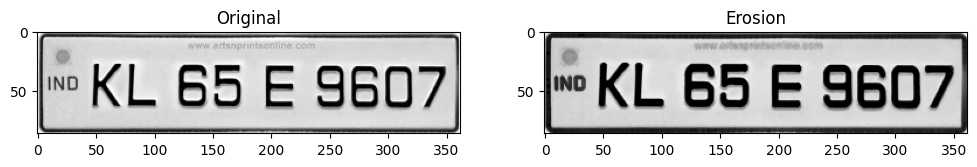

In [2]:
img = cv2.imread('numberplatee.png', 0)
custom_kernel = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=np.uint8)

img_erosion_custom = cv2.erode(img, custom_kernel, iterations=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img_erosion_custom, cmap='gray')
plt.title('Erosion')


Text(0.5, 1.0, 'Dilation')

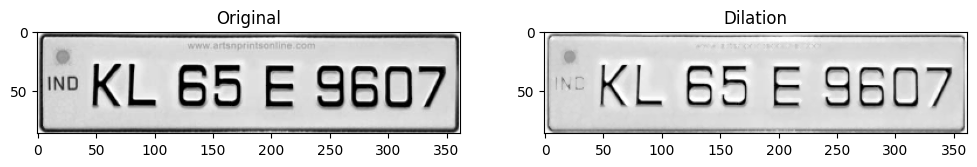

In [3]:
img_dilation_custom = cv2.dilate(img, custom_kernel, iterations=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 2,2)
plt.imshow(img_dilation_custom, cmap='gray')
plt.title('Dilation')

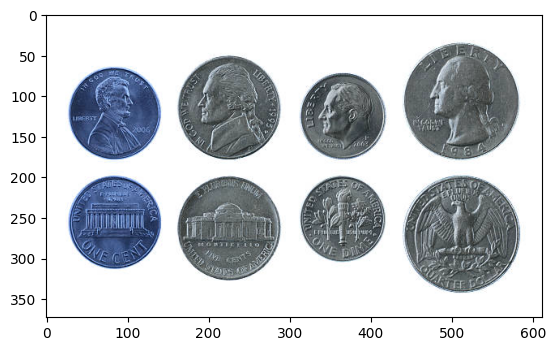

In [4]:
img = cv2.imread("coinns.jpg")
plt.imshow(img)

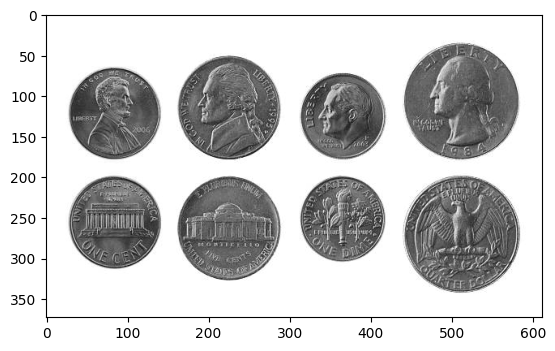

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,"gray")

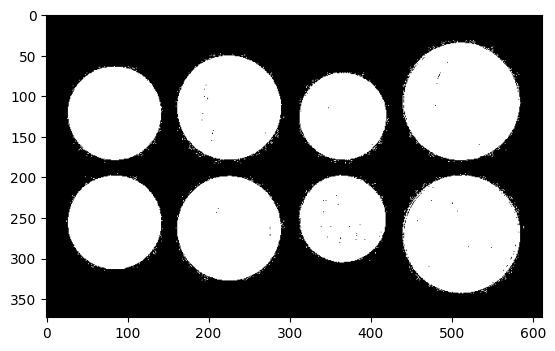

In [6]:
# Binary Image
ret, bin_img = cv2.threshold(gray,0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

threshold_factor = 1.4

adjusted_threshold = ret * threshold_factor
ret, bin_img = cv2.threshold(gray,adjusted_threshold, 255,cv2.THRESH_BINARY_INV)

plt.imshow(bin_img, cmap="gray")

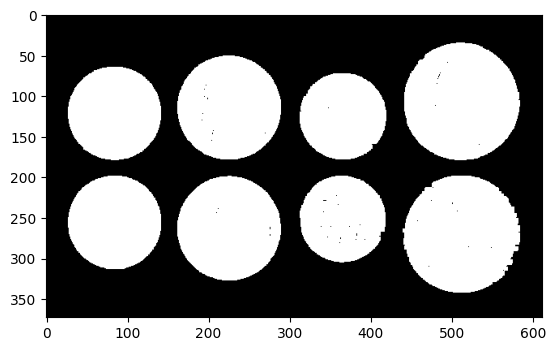

In [7]:
# Noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel,iterations=2)
plt.imshow(bin_img,"gray")

Text(0.5, 1.0, 'Foreground')

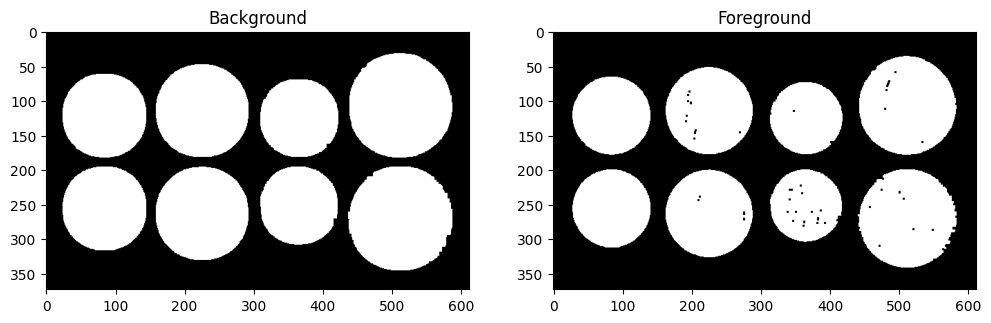

In [8]:
# Background and Foreground

sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.imshow(sure_bg,"gray")
plt.title('Background')

dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist, 0.029 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
plt.subplot(1,2,2)
plt.imshow(sure_fg,"gray")
plt.title('Foreground')

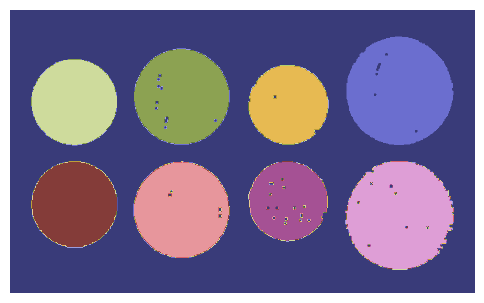

In [9]:
# Coins in Different Colors
ret, markers = cv2.connectedComponents(sure_fg)
markers += 1

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

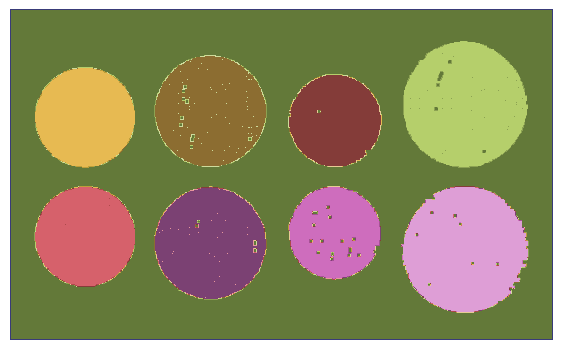

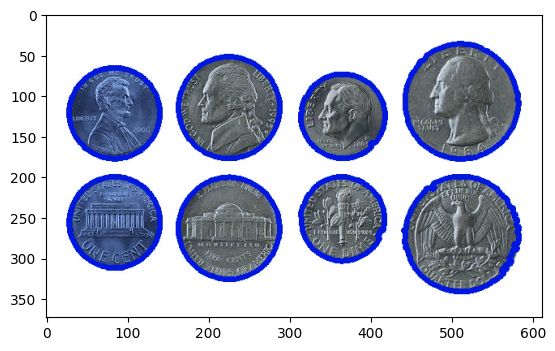

In [10]:
# watershed Algorithm to Segment images

markers = cv2.watershed(img, markers)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

labels = np.unique(markers)

coins = []
for label in labels[2:]:
 target = np.where(markers == label, 255, 0).astype(np.uint8)
# Perform contour extraction on the created binary image

 contours, hierarchy = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 coins.append(contours[0])

# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=5)
plt.imshow(img)